In [1]:
# 🧠 Predictive Maintenance – Test načítání dat s filtrem
# 📦 Importy:

import sys
import os
import pandas as pd
sys.path.append(os.path.abspath(".."))
from data.database_connection import get_engine
from data.data_loader import (
    get_unique_equipment_ids,
    get_unique_kpi_ids,
    get_unique_object_ids,
    fetch_sensor_data_filtered
)

In [2]:
# --- 1. Získání dostupných hodnot ---

print("🔎 Načítám dostupné hodnoty z databáze...")

equipment_ids = get_unique_equipment_ids()
print(f"✅ {len(equipment_ids)} unikátních equipment_id")
kpi_ids = get_unique_kpi_ids()
print(f"✅ {len(kpi_ids)} unikátních kpi_id")
object_ids = get_unique_object_ids()
print(f"✅ {len(object_ids)} unikátních object_id")

🔎 Načítám dostupné hodnoty z databáze...
✅ SQLAlchemy engine vytvořen.
✅ 77 unikátních equipment_id
✅ SQLAlchemy engine vytvořen.
✅ 38 unikátních kpi_id
✅ SQLAlchemy engine vytvořen.
✅ 1 unikátních object_id


In [3]:
# --- 2. Ruční výběr hodnot pro testování ---

# ZDE MĚŇ PARAMETRY PRO TEST
selected_object_id = 1
selected_kpi_id = None # nebo konkrétní KPI stylem [1,2,3] 
#selected_kpi_id = [1,2,3,4,5,6,7,8,9,23,24,25,26,27,28,29,30,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70] 
start_time = "2025-02-01 00:00:00"
end_time = "2025-03-01 00:00:00"

print(f"\n🎯 Vybrané parametry:\n- FC OBJECT ID: {selected_object_id}\n- KPI ID: {selected_kpi_id}\n- Období: {start_time} – {end_time}")


🎯 Vybrané parametry:
- FC OBJECT ID: 1
- KPI ID: None
- Období: 2025-02-01 00:00:00 – 2025-03-01 00:00:00


In [4]:
# --- 3. Filtrování dat ---
filtered_df = fetch_sensor_data_filtered(
    object_id=selected_object_id,
    kpi_ids=selected_kpi_id,
    start_time=start_time,
    end_time=end_time
)

✅ SQLAlchemy engine vytvořen.


In [5]:
# --- 4. Náhled výsledku ---
print(f"\n📊 Načteno {len(filtered_df)} řádků.")
filtered_df.head(3)


📊 Načteno 1087938 řádků.


,id,time_created,time_updated,id_fc_object,value,display_value,id_fc_kpi_definition,id_fc_application,data_timestamp,item_declared,time_created_raw,data_timestamp_raw
0,19372586,2025-02-03 06:52:56,2025-03-12 14:45:24.824,1,3643.638427734375,3643.638427734375,55,1,2025-02-03 06:51:56,0,1738565576,1738565515
1,19372587,2025-02-03 06:52:56,2025-03-12 14:45:24.824,1,25,25 (expected),52,1,2025-02-03 06:51:56,0,1738565576,1738565515
2,19372588,2025-02-03 06:52:56,2025-03-12 14:45:24.824,1,0,0 (expected),51,1,2025-02-03 06:51:56,0,1738565576,1738565515


In [6]:
# Předzpracování vyžaduje sloupce: timestamp, object_id, kpi_id, value

df = filtered_df.rename(columns={
    'data_timestamp': 'timestamp',
    'id_fc_object': 'object_id',
    'id_fc_kpi_definition': 'kpi_id',
    'value': 'value'
})

In [7]:
# Spuštění předzpracování
from utils.preprocessing import preprocess_sensor_data

processed = preprocess_sensor_data(df, impute=True)

c:\Users\tomas\OneDrive\Python\PredictiveMaintenance\utils\preprocessing.py:78: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  s_res = s.resample(freq).agg(agg)


In [8]:
# Vezmeme první stroj (object_id) a zobrazíme jeho dataframe
if processed:
    first_object_id = list(processed.keys())[0]
    print(f"🔍 Výstup pro object_id: {first_object_id}")
    display(processed[first_object_id].head(5))
else:
    print("⚠️ Nebyla nalezena žádná data po zpracování.")

🔍 Výstup pro object_id: 1


,1,2,3,4,5,6,7,8,9,23,...,59,60,61,62,63,64,65,68,69,70
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-02 21:05:00,-1.490623,-1.512441,0.154226,1.61381,-1.518807,-1.514108,-2.066821,-1.952136,-1.522944,-1.550279,...,-1.565826,-2.066821,-1.487158,0.8375,-0.130111,-2.039357,-1.485987,-2.348588,1.492246,-1.487432
2025-02-02 21:10:00,-1.490623,-1.512441,0.153716,1.61381,-1.518807,-1.514108,-2.066821,-1.952136,-1.522024,-1.550279,...,-1.565826,-2.066821,-1.487158,0.8375,-0.361756,-2.039357,-1.485987,-2.348588,1.492246,-1.487933
2025-02-02 21:15:00,-1.490623,-1.512441,0.175252,1.61381,-1.518807,-1.514108,-2.066821,-1.952136,-1.522812,-1.550279,...,-1.565826,-2.066821,-1.487158,0.8375,-0.361881,-2.039357,-1.485987,-2.348588,1.492246,-1.488937
2025-02-02 21:20:00,-1.490623,-1.512441,0.401624,1.61381,-1.518807,-1.514108,-2.066821,-1.952136,-1.522769,-1.550279,...,-1.565826,-2.066821,-1.487158,0.8375,-0.361769,-2.039357,-1.485987,-2.348588,1.492246,-1.489438
2025-02-02 21:25:00,-1.490623,-1.512441,0.884077,1.61381,-1.518807,-1.514108,-2.066821,-1.952136,-1.522331,-1.550279,...,-1.565826,-2.066821,-1.487158,0.8375,-0.361581,-2.039357,-1.485987,-2.348588,1.492246,-1.489438


In [9]:
from utils.visualization import (
    plot_kpi_raw_trends,
    plot_kpi_rolling,
    plot_correlation_heatmap,
    plot_feature_distributions,
    plot_missing_data_pattern
)

✅ Vykresluji následující KPI: [1, 2, 3, 5, 6, 7, 8, 9, 23, 25, 26, 27, 28, 29, 30, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70]


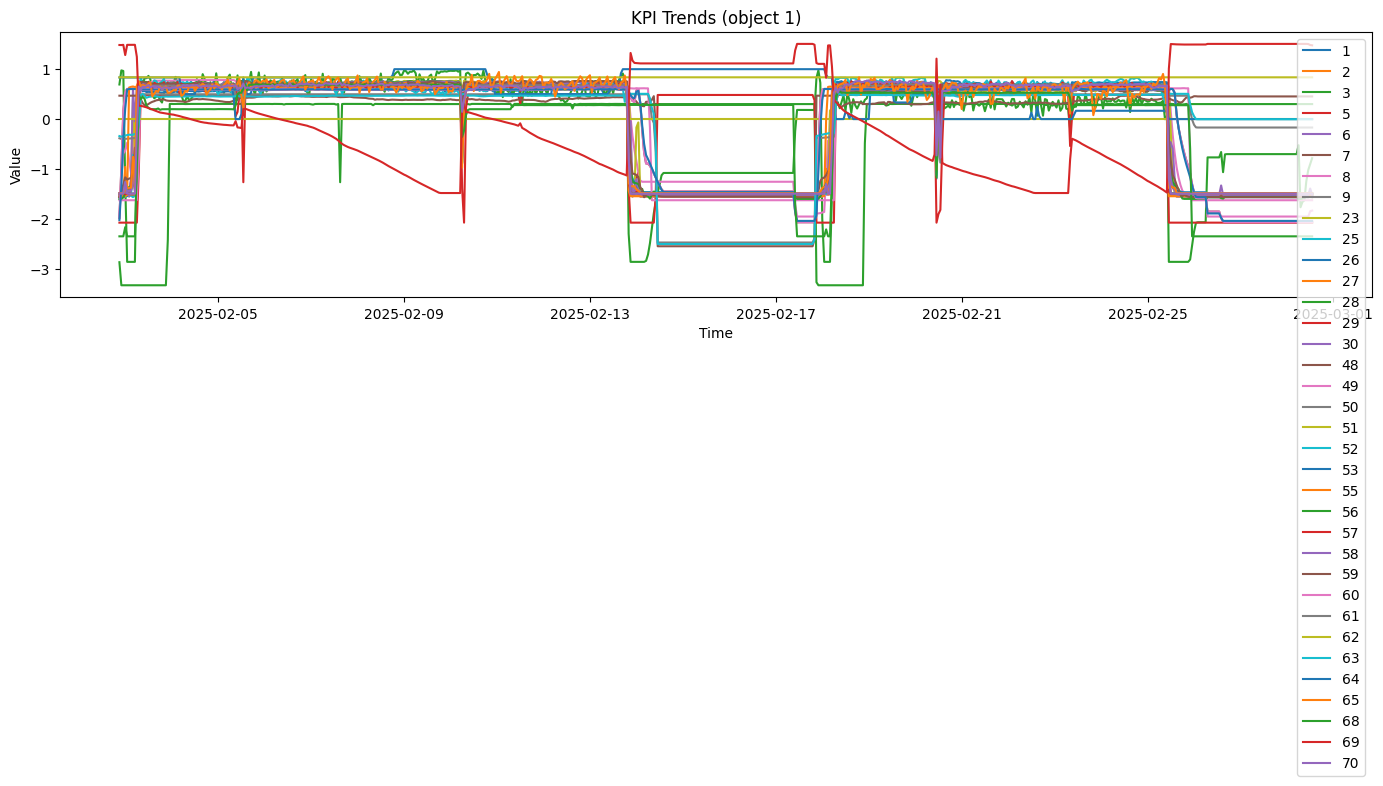

In [10]:
# Trendy pro KPI
plot_kpi_raw_trends(
    df=processed,            # Vstupní data – buď slovník {object_id: DataFrame}, nebo přímo DataFrame
    object_id=1,             # ID objektu – použije se pouze pokud je df slovník

    #kpi_ids=None,            # Seznam KPI, které chceš vykreslit (např. [7, 8, 23])
                             # Pokud None, zobrazí se všechny číselné sloupce (raw i engineered)
    kpi_ids = [1,2,3,5,6,7,8,9,23,25,26,27,28,29,30,48,49,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,68,69,70],
    #kpi_ids = [1,2,3,4,5,6,7,8,9,23,24,25,26,27,28,29,30,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70],


    feature_types=[          # Volitelné zúžení podle typu feature:
        'raw'              
        #   'raw' Originální KPI hodnoty (např. '7', '8', '23')             
        #   'mean' Rolling průměry (např. 'mean_6')               
        #   'std' Rolling směrodatné odchylky (např. 'std_3')       
        #   'diff1' První diference
        #   'diff2' Druhá diference        
        #   'pct_change' Procentuální změna        
        #   'time_since' Speciální sloupec 'time_since_last'
        #   'rolling' Zástupný typ – zahrne mean + std dohromady
    ],

    agg_freq='1h',           # Agregační frekvence (resampling), např. '1min', '15t', '1h'
                             # Použije se na časovou osu – např. 1h = průměrování po hodinách

    highlight_missing=True,   # Zvýraznit chybějící hodnoty červenými značkami (např. kde je NaN)
    start_time=None,   # Počáteční časový filtr buďto nechat "start_time" nebo konkrétní čas (např. "2025-01-01 00:00:00")
    end_time=None       # Koncový časový filtr buďto nechat "end_time" nebo konkrétní čas (např. "2025-03-01 00:00:00")
)


✅ Rolling výpočet pro KPI: [23]


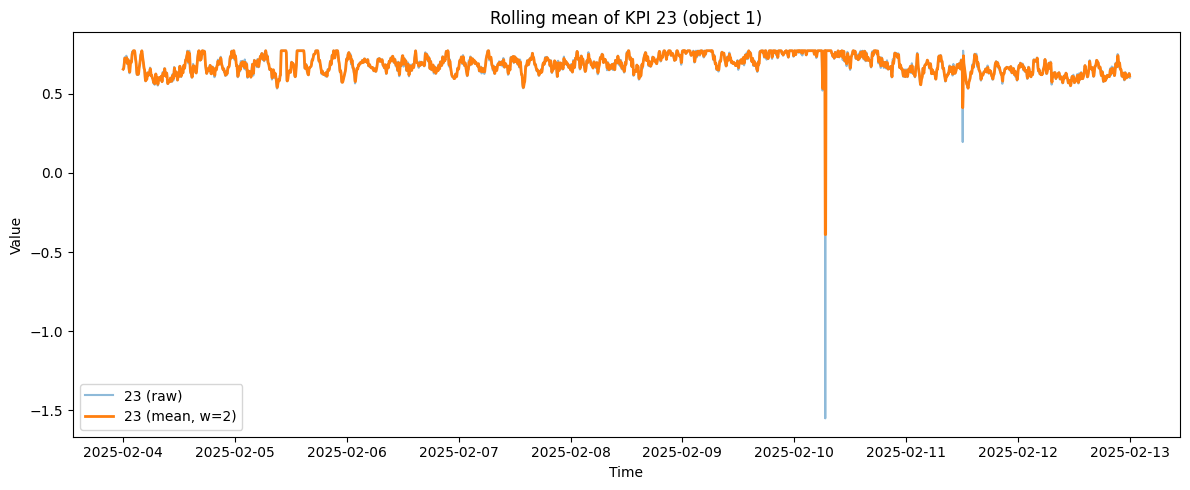

In [24]:
# Rolling mean s oknem 6 vzorků
plot_kpi_rolling(
    df=processed,                # Dict nebo DataFrame
    object_id=1,                 # ID objektu (stroje)
    #kpi_ids=None,                # Seznam KPI (např. [23, 24]) nebo None = všechny KPI
    kpi_ids=[23],
    #kpi_ids=[1,2,3,4,5,6,7,8,9,23,24,25,26,27,28,29,30,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70],
    window=2,                    # Rolling okno (počet časových kroků), např. 6
    method='mean',                # Typ výpočtu: 'mean', 'std', 'max', 'min', ...
    #start_time=start_time,       # Počáteční časový filtr
    start_time="2025-02-04 00:00:00",
    #end_time=end_time            # Koncový časový filtr
    end_time="2025-02-13 00:00:00"
)

✅ Výběr KPI pro korelační matici: [1, 2, 3, 5, 6, 7, 8, 9, 23, 25, 26, 27, 28, 29, 30, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 70]


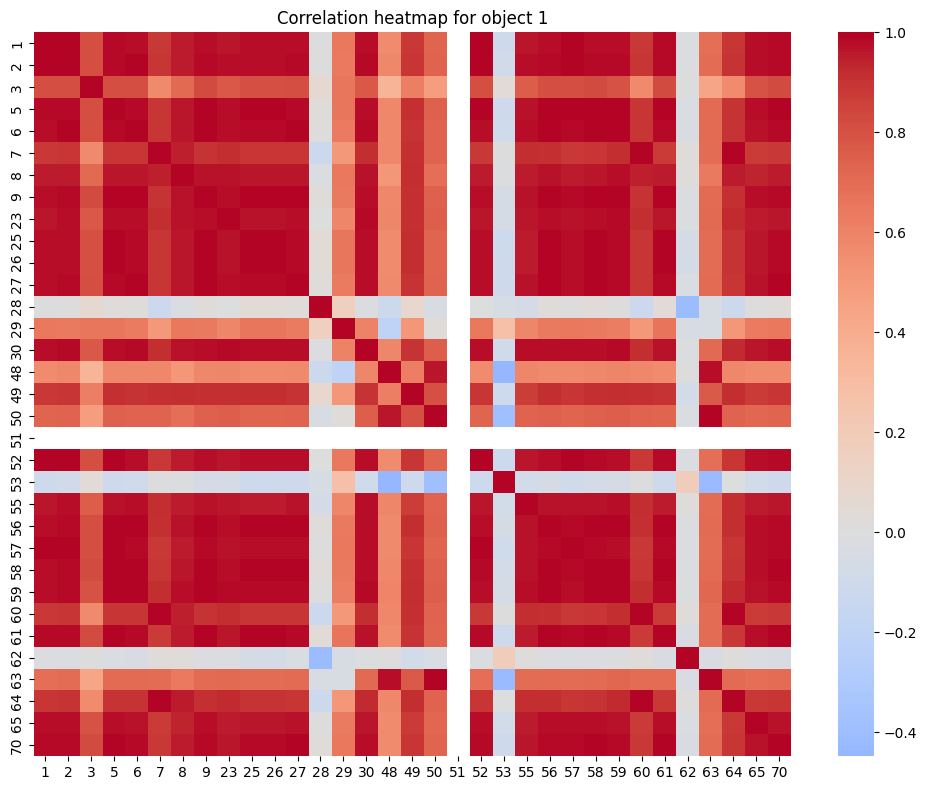

In [27]:
plot_correlation_heatmap(
    df=processed,            # Vstupní data – buď DataFrame nebo dict ve formátu {object_id: DataFrame}
    object_id=1,             # ID objektu – použije se jako klíč pro výběr ze slovníku (pokud je df typu dict)

    #kpi_ids=None,            # Volitelný výběr konkrétních KPI podle ID – např. [7, 8, 23]
                             # Pokud None, použijí se všechny KPI (dle výběru feature types níže)
    #kpi_ids=[1,2,3,4,5,6,7,8,9,23,24,25,26,27,28,29,30,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70],
    kpi_ids=[1,2,3,5,6,7,8,9,23,25,26,27,28,29,30,48,49,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,70],

    feature_types=[          # Výběr typů sloupců (feature), které se mají zahrnout do korelační matice:
        'raw'           
        #   'raw' Pouze původní KPI sloupce, např. '7', '8', '23'
        #   'mean' Rolling průměr, např. '7_mean_6'
        #   'std' Rolling směrodatná odchylka, např. '7_std_6'
        #   'diff1' První diference, např. '7_diff1'
        #   'diff2' Druhá diference, např. '7_diff2'
        #   'pct_change' Procentuální změna, např. '7_pct_change'
        #   'time_since' Speciální feature např. 'time_since_last'
        #   'rolling' Zahrne všechny rolling features (mean_, std_), alias pro pohodlí
    ],
    start_time=start_time,       # Počáteční časový filtr
    end_time=end_time            # Koncový časový filtr
)

✅ Histogramy budou vykresleny pro KPI: Index([23], dtype='int64')


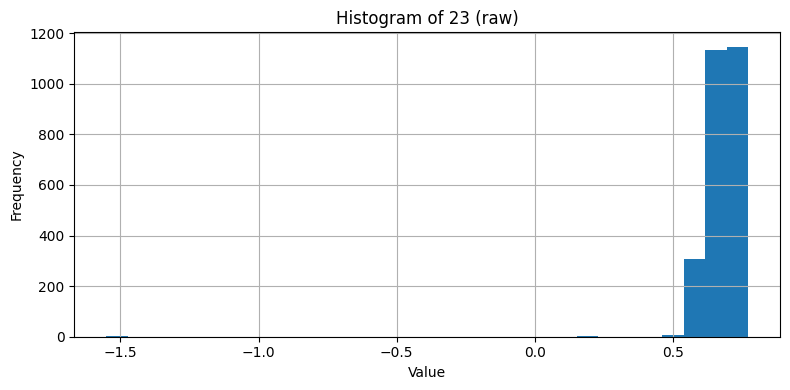

In [33]:
# Histogramy dat
plot_feature_distributions(
    df=processed,              # Dict nebo DataFrame
    object_id=1,               # ID objektu
    kpi_ids=[23],              # Konkrétní KPI (např. [8, 23, 25]); None = všechny
    raw=True,                 # True = použít neskalovaná data (pouze originální KPI)
    log=False,                  # True = logaritmická osa pro histogram
    #start_time=start_time,       # Počáteční časový filtr
    start_time="2025-02-04 00:00:00",
    #end_time=end_time            # Koncový časový filtr
    end_time="2025-02-13 00:00:00"
)

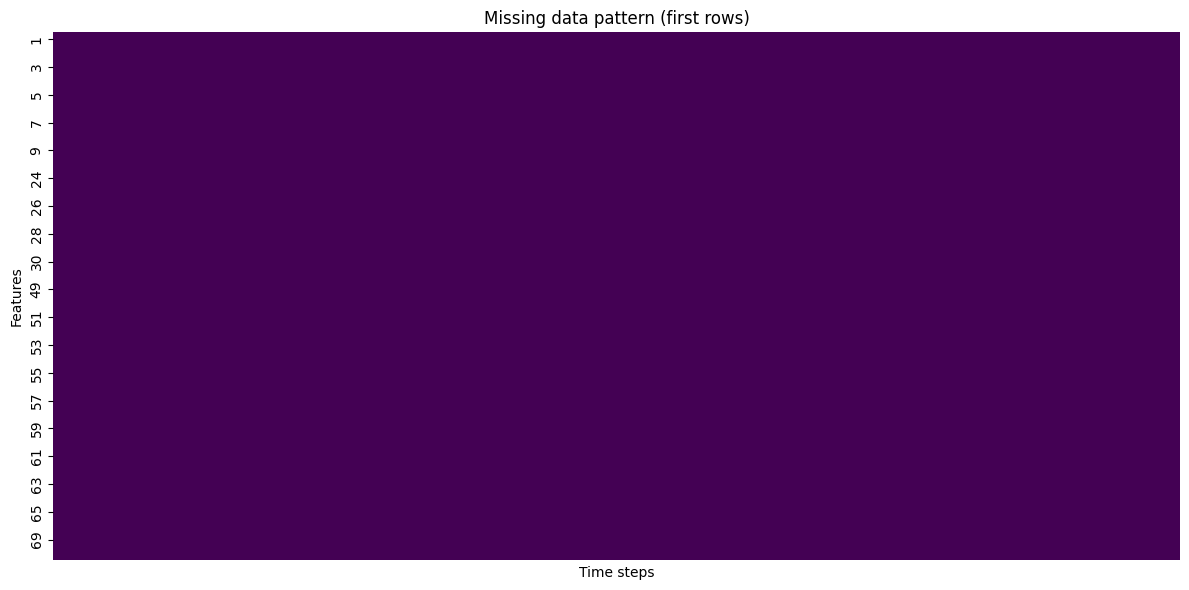

In [34]:
# Vizualizace chybějících dat
plot_missing_data_pattern(
    df=processed,              # Dict nebo DataFrame
    object_id=1,               # ID objektu
    n_rows=5000,                 # Počet časových řádků k zobrazení (např. 500 = prvních 500 timestamps)
    start_time=start_time,       # Počáteční časový filtr
    end_time=end_time            # Koncový časový filtr
)